In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
name_row = ['age','sex','chest_pain','blood pressure','serum_cholestrol','fasting_blood_sugar','electrocardiographic','max_heart_rate','induced_angina','ST_depression','slope','vessels',
            'thal','target']
df = pd.read_csv("heart.csv", names=name_row)
df=df.iloc[1:]
df.head()

,age,sex,chest_pain,blood pressure,serum_cholestrol,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,vessels,thal,target
1,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
2,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
3,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
4,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
5,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 1 to 303
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   303 non-null    int32  
 1   sex                   303 non-null    int32  
 2   chest_pain            303 non-null    int32  
 3   blood pressure        303 non-null    int32  
 4   serum_cholestrol      303 non-null    int32  
 5   fasting_blood_sugar   303 non-null    int32  
 6   electrocardiographic  303 non-null    int32  
 7   max_heart_rate        303 non-null    int32  
 8   induced_angina        303 non-null    int32  
 9   ST_depression         303 non-null    float64
 10  slope                 303 non-null    int32  
 11  vessels               303 non-null    int32  
 12  thal                  303 non-null    int32  
 13  target                303 non-null    int32  
dtypes: float64(1), int32(13)
memory usage: 17.8 KB


In [10]:
df.duplicated()

1      False
2      False
3      False
4      False
5      False
       ...  
299    False
300    False
301    False
302    False
303    False
Length: 303, dtype: bool

In [12]:
a=df.duplicated()
if a.any():
    print(df.loc[a])

     age  sex  chest_pain  blood pressure  serum_cholestrol  \
165   38    1           2             138               175   

     fasting_blood_sugar  electrocardiographic  max_heart_rate  \
165                    0                     1             173   

     induced_angina  ST_depression  slope  vessels  thal  target  
165               0            0.0      2        4     2       1  


In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 1 to 303
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   302 non-null    int32  
 1   sex                   302 non-null    int32  
 2   chest_pain            302 non-null    int32  
 3   blood pressure        302 non-null    int32  
 4   serum_cholestrol      302 non-null    int32  
 5   fasting_blood_sugar   302 non-null    int32  
 6   electrocardiographic  302 non-null    int32  
 7   max_heart_rate        302 non-null    int32  
 8   induced_angina        302 non-null    int32  
 9   ST_depression         302 non-null    float64
 10  slope                 302 non-null    int32  
 11  vessels               302 non-null    int32  
 12  thal                  302 non-null    int32  
 13  target                302 non-null    int32  
dtypes: float64(1), int32(13)
memory usage: 20.1 KB


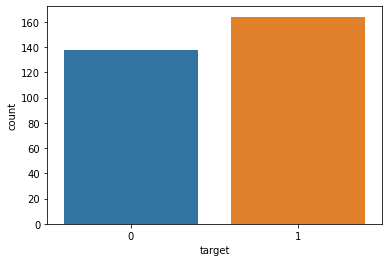

In [15]:
sns.countplot(df['target'])

In [17]:
# Other libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Machine Learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Logistic Regression

In [18]:
y = df['target']
X = df.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [19]:
X_scale=StandardScaler()
train_X=X_scale.fit_transform(X_train)
test_X=X_scale.fit_transform(X_test)
model=LogisticRegression()
model.fit(train_X,y_train)
predicted=model.predict(test_X)

In [20]:
from sklearn import metrics

In [21]:
metrics.accuracy_score(predicted,y_test)

0.8688524590163934

In [23]:
metrics.confusion_matrix(predicted, y_test)

array([[22,  3],
       [ 5, 31]], dtype=int64)

# Decision tree model

In [26]:
tree=DecisionTreeClassifier(criterion='entropy')
tree=tree.fit(train_X,y_train)
pred=tree.predict(test_X)
metrics.accuracy_score(pred,y_test)

0.7868852459016393

In [27]:
tree=DecisionTreeClassifier()
tree=tree.fit(train_X,y_train)
pred=tree.predict(test_X)
metrics.accuracy_score(pred,y_test)

0.7704918032786885

In [35]:
tree=DecisionTreeClassifier(criterion='entropy', max_depth=4)
tree=tree.fit(train_X,y_train)
pred=tree.predict(test_X)
metrics.accuracy_score(pred,y_test)

0.819672131147541

In [36]:
metrics.confusion_matrix(pred,y_test)

array([[21,  5],
       [ 6, 29]], dtype=int64)

# K-Nearest Neighbor Classifier

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

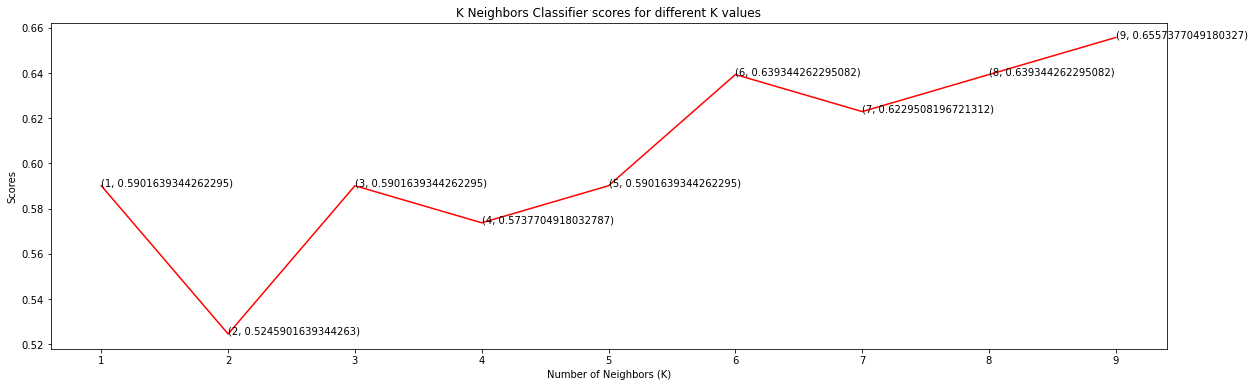

In [41]:
knn_scores = []
for k in range(1,10):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))
plt.figure(figsize=(20,6))
plt.plot([k for k in range(1, 10)], knn_scores, color = 'red')
for i in range(1,10):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 10)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [50]:
knn = KNeighborsClassifier(n_neighbors=6,metric='euclidean')
knn=knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
metrics.confusion_matrix(y_test, y_pred)

array([[16, 11],
       [11, 23]], dtype=int64)

In [52]:
k=(39/61)*100
print(k)

63.934426229508205


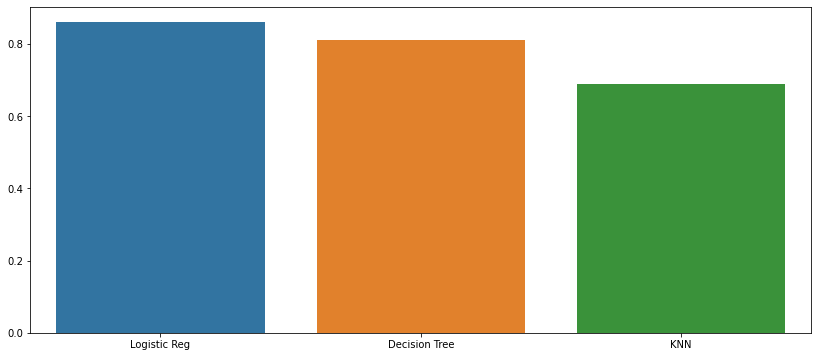

In [56]:
plt.figure(figsize=(14,6))
data={'Logistic Reg':0.86,'Decision Tree':0.81,'KNN':0.69}
ML_model=pd.DataFrame(data, index=[1,2,3])
sns.barplot(data=ML_model)

In [57]:
model.predict(test_X)

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])